<a href="https://colab.research.google.com/github/pmukeshreddy/big-shopping-mall/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



from nltk.corpus import twitter_samples        

nltk.download("twitter_samples")

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [35]:
all_positive_tweets = twitter_samples.strings("positive_tweets.json")
all_negative_tweets = twitter_samples.strings("negative_tweets.json")

tweets = all_positive_tweets+all_negative_tweets
labels = np.append(np.ones((len(all_positive_tweets),1)),np.zeros((len(all_negative_tweets),1)),axis=0)

train_pos = all_positive_tweets[:4000]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg

print("number of tweets is ",len(train_x))

number of tweets is  8000


In [20]:
np.ones((len(all_positive_tweets),1))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [34]:
np.zeros((len(all_negative_tweets),1))

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [22]:
data = pd.read_csv("/content/drive/MyDrive/coussara/nlp/logistic_features.csv")
data.head(10)

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


In [23]:
x = data[["bias","positive","negative"]].values
y = data["sentiment"].values

print(x.shape)
print(x)

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


In [24]:
theta = [6.03518871e-08, 5.38184972e-04, -5.58300168e-04]

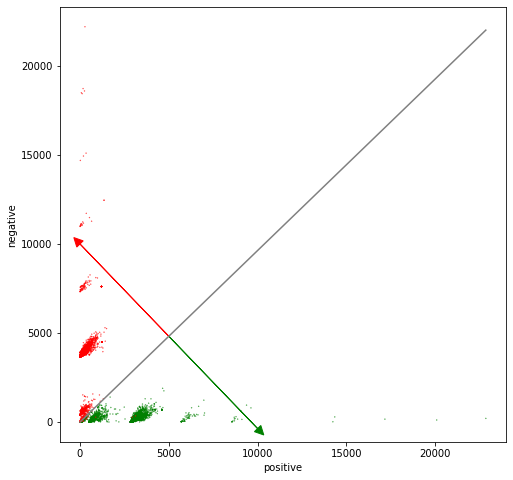

In [36]:
fig,ax = plt.subplots(figsize=(8,8))

colors = ["red","green"]
ax.scatter(x[:,1],x[:,2],c=[colors[int(k)] for k in y],s=0.1)
plt.xlabel("positive")
plt.ylabel("negative")


#lets repsent model as well

def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]



def direction(theta, pos):
    return  pos * theta[2] / theta[1]

maxpos = np.max(x[:,1])
offset = 5000
ax.plot([0,maxpos],[neg(theta,0),neg(theta,maxpos)],color="gray")
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

